In [1]:
!pip install seaborn



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import seaborn as sns


In [3]:
drugs = pd.read_csv("C:/Users/kyabr/Desktop/f2025/ML/FinalProject/CPSC544-Project/Titanic/drug200.csv")


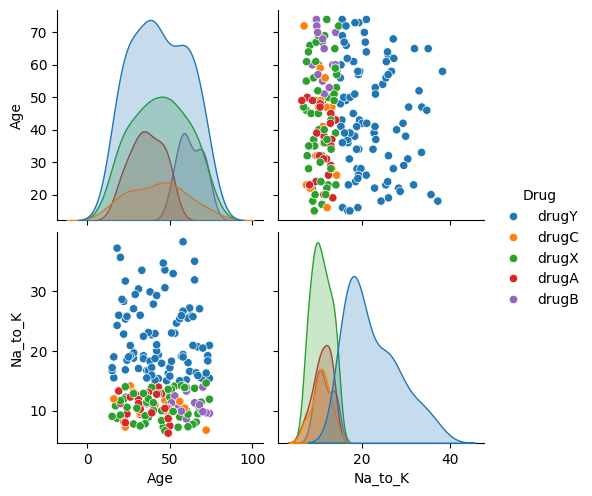

In [ ]:
sns.pairplot(data=drugs, hue='Drug')


In [5]:
drugs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
drugs.describe(include='O')


,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,drugY
freq,104,77,103,91


In [7]:
# We have some categorical features let's encode them 
# we can use one_hot_encodeing 
# or we can use labee_encoding 
# let's chooce label_encoding for this problem 
from sklearn.preprocessing import LabelEncoder

# initiating the class
label_enc = LabelEncoder()

# columns that are categorical 
cols = drugs.select_dtypes(include='O').columns
# looping on each column in the dataset
for col in cols:
    # Label encoding each column 
    drugs[col] = label_enc.fit_transform(drugs[col])

# displaying the data after encoding 
drugs

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


In [8]:
# dividing the data into X, y 
# X: the features 
# y : the target 🎯 
X = drugs.drop(columns='Drug')
y = drugs['Drug']

In [9]:
display(X.head(3), y.head(3))


,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114


0    4
1    2
2    2
Name: Drug, dtype: int32

In [10]:
# now we need to split the data into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)

In [12]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier


# Building the model 
tree_clf0 = DTC()
# Fitting the model
tree_clf0.fit(X_train,y_train)

DecisionTreeClassifier()

In [13]:
tree_clf0.score(X_train, y_train)


1.0

In [14]:
tree_clf0.score(X_test, y_test)


1.0

In [15]:
# another way of calculating the accuracy
from sklearn.metrics import accuracy_score, classification_report
y_pred = tree_clf0.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [16]:
# third way using more than one metric 
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



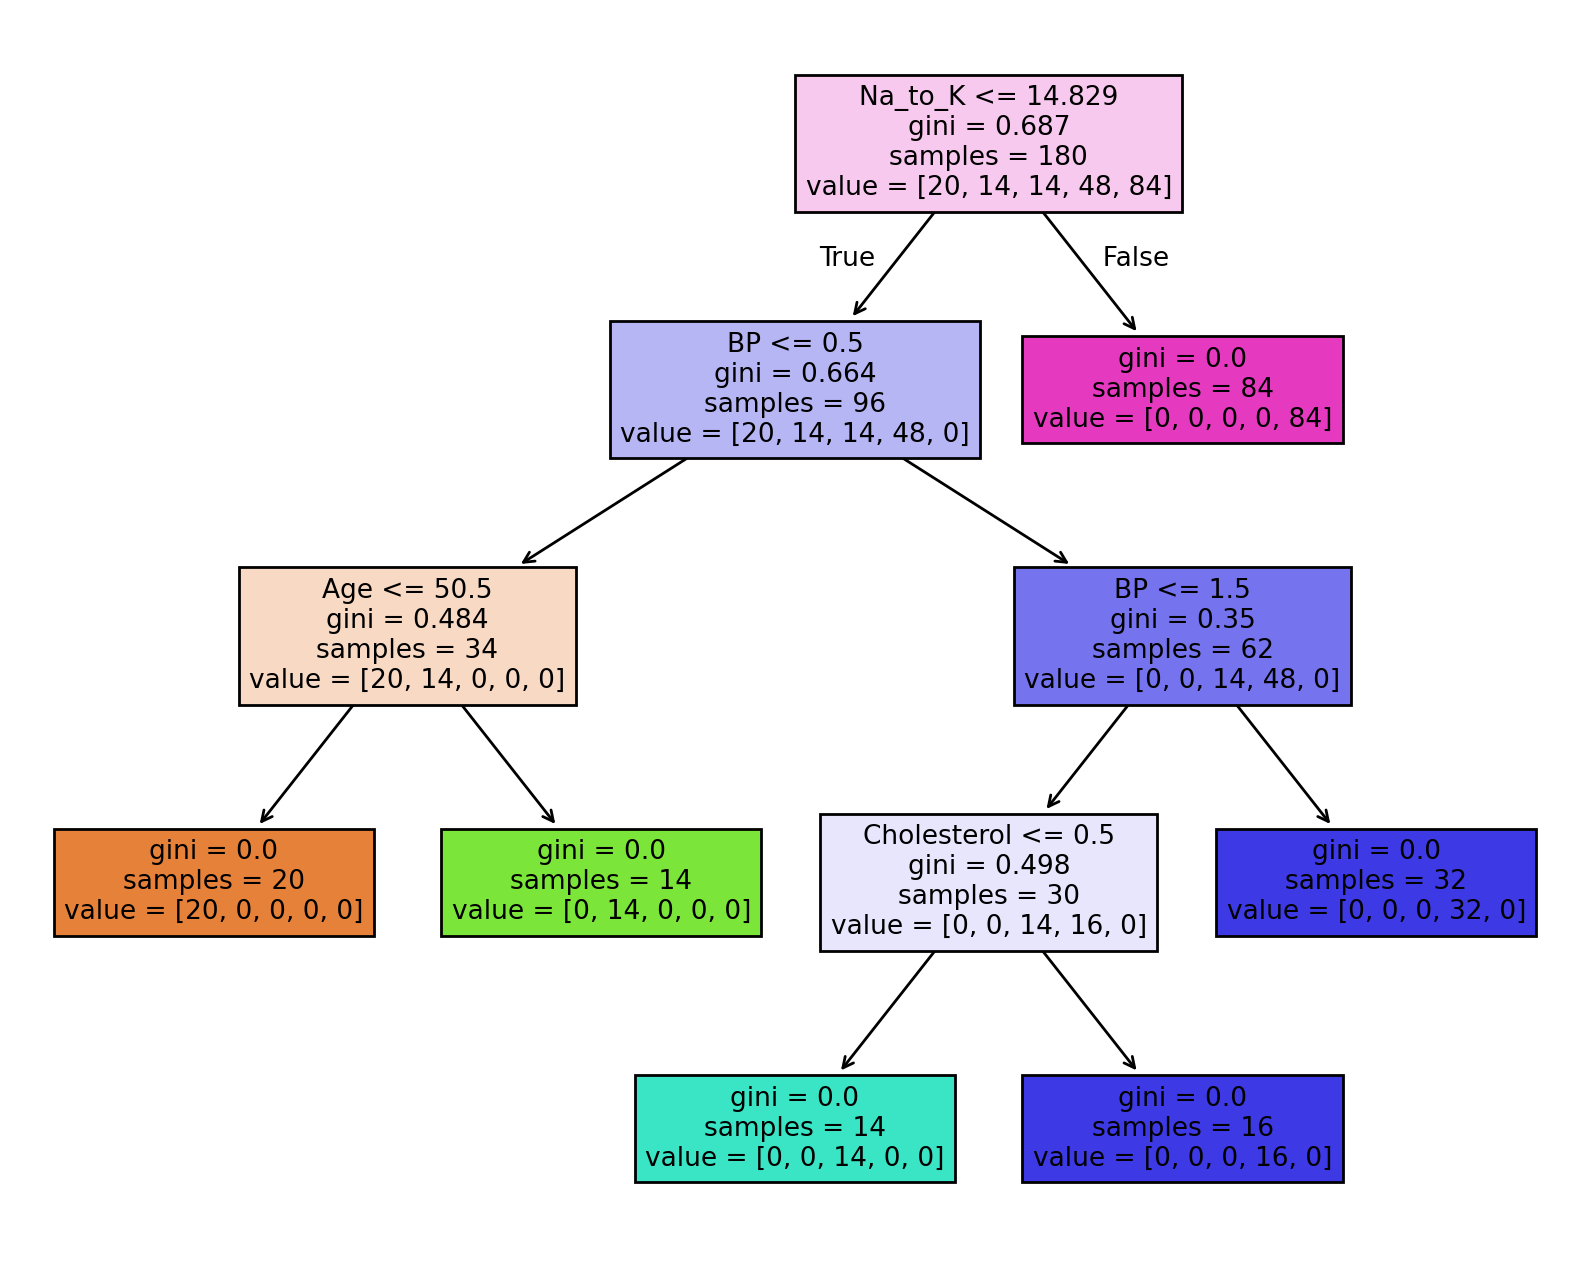

In [18]:
# visualsing👀 the Decision Tree🌳 
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8), dpi=200)
plot_tree(tree_clf0, feature_names=drugs.columns, filled=True);
# Optinal parameters
# feature_names=drugs.columns, filled=True  
# filled=True  colors